# **Universidad Central**

![UC](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)

## **Maestría en Analítica de Datos**
## *Fundamentos De Estadística Para La Analítica de Datos*
## **Profesor**: Nelson Alirio Cruz Gutierrez Ph.D.
## **Estudiantes**:
## Cristian Camilo Guevara Serrano
## Jennifer Alexandra Rodríguez Crespo 
## Stiven Leonardo Silva Castillo

## **Tarea: TLC y Ejercicios de la normal**

### Ejercicios

1. El peso máximo que un ascensor puede elevar es de 250 kg. Si conocemos que el peso humano se distribuye según una normal de media 70 y desviación 20 . Calcular la probabilidad de que el ascensor no aguante si suben en él tres personas.

2. El coeficiente intelectual de los humanos se distribuye normalmente con media 100 y desviación típica 15 .En Colombia con 50 millones de habitantes
* ¿Cuántos normales habrá, si se denomina normal a la persona con coeficiente entre 95 y 105 ?
* ¿Cuántas personas habrá de inteligencia superior si ésta es aquella cuyo coeficiente es superior a 130?

3. 	Se ha comprobado que el peso de un paquete sigue una distribución normal . Los controles de calidad revelaron que un tercio de los paquetes pesaban menos de 870 gr y que sólo dos de cada mil paquetes pesaban más de 1 kg. . Calcular .
* La probabilidad de que si elegimos un paquete al azar éste pese más de 850 g.
* Si en una semana salen al mercado 40000 paquetes ¿Cuántos cabe esperar que pesen mas de 900 g?

# **DESARROLLO PUNTO 1**

1. El peso máximo que un ascensor puede elevar es de 250 kg. Si conocemos que el peso humano se distribuye según una normal de media 70 y desviación 20 . Calcular la probabilidad de que el ascensor no aguante si suben en él tres personas.

Para resolver este ejercicio en Python, primero necesitamos importar la biblioteca `scipy.stats` que nos proporcionará las funciones necesarias para realizar cálculos de probabilidad.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb

Luego, podemos definir las variables necesarias:



In [ ]:
peso_maximo = 250 # kg
n_personas = 3
media_peso = 70 # kg
desviacion_peso = 20 # kg

A continuación, podemos calcular la media y la desviación estándar de la suma de los pesos de las tres personas utilizando las fórmulas de la distribución normal:

In [ ]:
media_suma = n_personas * media_peso                   # media de n normales
desviacion_suma = np.sqrt(np.sum(n_personas * desviacion_peso**2))  # La raíz cuadrada de la suma de las varianzas de cada persona, elevada al cuadrado

Finalmente, podemos utilizar la función `stats.norm.cdf` para calcular la probabilidad de que el ascensor no aguante. La probabilidad de que el peso total sea mayor que el peso máximo que el ascensor puede soportar se calcula como 1 menos la probabilidad acumulada hasta el peso máximo:



In [ ]:
probabilidad = 1 - stats.norm.cdf(peso_maximo, loc=media_suma, scale=desviacion_suma)
probabilidad

0.12410653949496186

La variable `loc` es la media de la distribución y la variable `scale` es la desviación estándar de la distribución.



In [ ]:
print("La probabilidad de que el ascensor no aguante es:", probabilidad)

La probabilidad de que el ascensor no aguante es: 0.12410653949496186


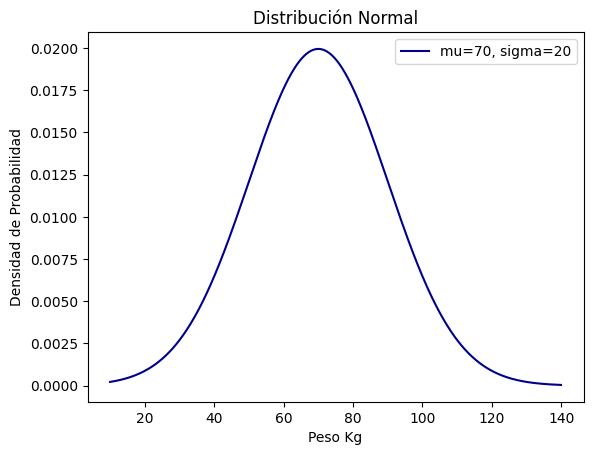

In [ ]:
from scipy.stats import norm
x = np.arange(10, 140, 0.1)
y = norm.pdf(x, loc = media_peso, scale = desviacion_peso)
plt.title('Distribución Normal')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Peso Kg')   
plt.plot(x, y, label="mu=70, sigma=20", color = "darkblue")
plt.legend()

# **DESARROLLO PUNTO 2**

2. El coeficiente intelectual de los humanos se distribuye normalmente con media 100 y desviación típica 15 .En Colombia con 50 millones de habitantes
* ¿Cuántos normales habrá, si se denomina normal a la persona con coeficiente entre 95 y 105 ?
* ¿Cuántas personas habrá de inteligencia superior si ésta es aquella cuyo coeficiente es superior a 130?

2.1 Para calcular cuántos habitantes tienen un coeficiente intelectual entre 95 y 105, necesitamos calcular la probabilidad de que una persona tenga un coeficiente intelectual dentro de ese rango. 

Podemos hacer esto utilizando la función `stats.norm.cdf` para calcular la probabilidad acumulada hasta 105 y restando la probabilidad acumulada hasta 95:



Inicialmente se definen las variables correspondientes de media y desviación

In [ ]:
media_intelectual = 100
std_intelectual = 15
poblacion = 50_000_000

Posterior a esto se define una distribución normal con media 100 y desviación de 15

In [ ]:
distribucion = norm(loc = media_intelectual, scale = std_intelectual)

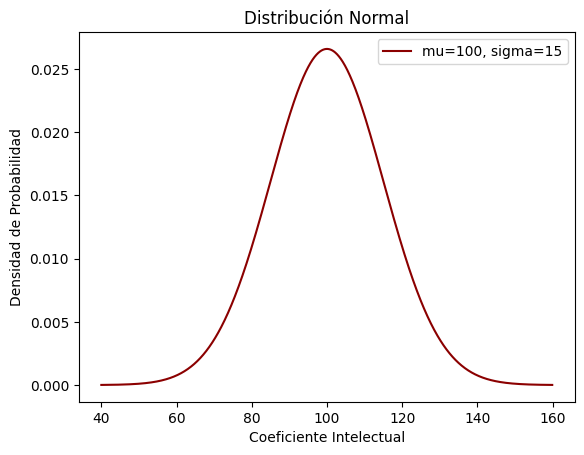

In [ ]:
x = np.arange(40, 160, 0.1)
y = norm.pdf(x, 100, 15)
plt.title('Distribución Normal')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Coeficiente Intelectual')  
plt.plot(x, y, label="mu=100, sigma=15", color = "darkred")
plt.legend()
plt.show()

A continuación, se estiman las probabilidades de tener un coeficiente de 95 y uno de 100 respectivamente

In [ ]:
prob95 = distribucion.sf(95) 
prob95

0.6305586598182363

In [ ]:
prob105 = distribucion.sf(105)
prob105

0.36944134018176367

De esto, se estima la probabilidad de estar entre 95 y 105, que seria equivalente a decir:

$$P(95 a 100) = P(95) - P(105) $$

In [ ]:
p = prob95 - prob105
print("La probabilidad de tener un coeficiente entre el 95 y 105 es de:",p)

La probabilidad de tener un coeficiente entre el 95 y 105 es de: 0.26111731963647267


Finalmente, se estima la cantidad de población, multiplicando la probabilidad por el total de la población.

In [ ]:
n_pobla_95_a_100 = round(poblacion*p,0)

In [ ]:
print("La cantidad de normales, es de:", "{:.0f}".format(n_pobla_95_a_100))

La cantidad de normales, es de: 13055866


2.2 Para calcular cuántas personas tienen un coeficiente intelectual superior a 130, podemos utilizar la función `stats.norm.sf` para calcular la probabilidad acumulada después de 130:



In [ ]:
prob130 = distribucion.sf(130)
prob130

0.022750131948179195

Finalmente, se toma dicha probabilidad y se multiplica por la cantidad de población total.


In [ ]:
n_pobla_130 = round(poblacion*prob130,0)
print("La cantidad de personas con inteligencia superior, es de:", "{:.0f}".format(n_pobla_130))

La cantidad de personas con inteligencia superior, es de: 1137507


# **DESARROLLO PUNTO 3**

3. 	Se ha comprobado que el peso de un paquete sigue una distribución normal . Los controles de calidad revelaron que un tienen una media de 850 y una desviación de 50 g .
* La probabilidad de que si elegimos un paquete al azar éste pese más de 850 g.
* Si en una semana salen al mercado 40000 paquetes ¿Cuántos cabe esperar que pesen mas de 900 g?

3.1 Para calcular la probabilidad de que si elegimos un paqute al azar éste pese más de 850g

Inicialmente identificamos las variables que se tienen como media y desviación

In [ ]:
media_paq = 850
desv_paq = 50

Se crea la distribución normal que tiene media 850 y desviación 50 y gráficamos la curva de la normal

In [ ]:
dist_normal = norm(loc = media_paq, scale = desv_paq)

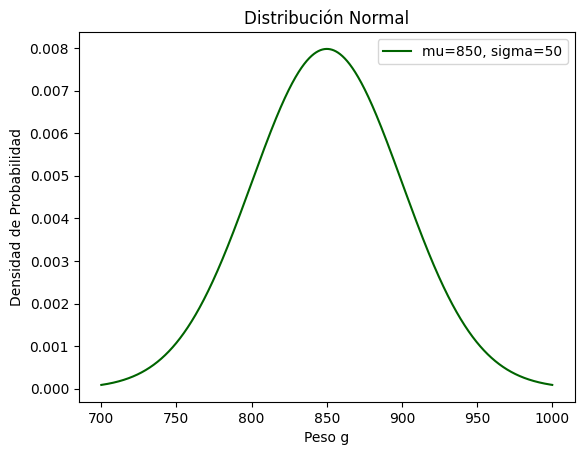

In [ ]:
x = np.arange(700, 1000, 0.1)
y = norm.pdf(x, media_paq, desv_paq)
plt.title('Distribución Normal')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Peso g')  
plt.plot(x, y, label="mu=850, sigma=50", color = "darkgreen")
plt.legend()
plt.show()

La probabilidad de que si elegimos un paquete al azar éste pese más de 850 g.

In [ ]:
p_mayor_850 = 1 - norm.cdf(850, media_paq, desv_paq)
print("La Probabilidad de que un paquete pese mas de 850g es :","{:.2f}".format(p_mayor_850))

La Probabilidad de que un paquete pese mas de 850g es : 0.50


3.2 Ahora se debe calcular la probabilidad de que si en una semana salen al mercado 40.000 paquetes ¿Cuántos cabe esperar que pesen mas de 900 g?





Inicialmente vamos a calcular la probabilidad de que un paquete pese mas de 900g

In [ ]:
p_mayor_900 = 1 - norm.cdf(900, media_paq, desv_paq)
print("La Probabilidad de que un paquete pese mas de 900g es :","{:.5f}".format(p_mayor_900))

La Probabilidad de que un paquete pese mas de 900g es : 0.15866


Para calcular que en una semana salgan al mercado 40.000 paquetes que pesen mas de 900g se debe multiplicar la probabilidad de que 1 paquete pese mas de 900g por los 40.000 paquetes asi:

In [ ]:
p_40mil_mayor_900 = 40000 * p_mayor_900
print("En una semana se espera que","{:.0f}".format(p_40mil_mayor_900),"paquetes pesen mas de 900g")

En una semana se espera que 6346 paquetes pesen mas de 900g
